# Cyberbullying Detection 

In [1]:
# Result
import sklearn
import sklearn.metrics as sm
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
plt.style.use('seaborn-whitegrid')          # graph settings
plt.rcParams['figure.figsize'] = (12,5)    # graph settings

# Data splitting
from sklearn.model_selection import train_test_split

# Data wrangling
import numpy as np 
import pandas as pd

# Corpus
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# String manipulation
import re
import spacy
import collections

## Import Data

In [2]:
# Load the file into the dataframe
# tdf = twitter file dataframe
tdf = pd.read_csv("C:/Cyberbullying Detection/twitterDataset.csv", index_col = 0) #Skip the index column

# View sample of file
tdf.head() 

,Toxicity,Tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [3]:
print("There are {} tweets and {} features in this dataset".format(tdf.shape[0], tdf.shape[1]))

There are 56745 tweets and 2 features in this dataset


In [4]:
tGrp = tdf.groupby("Toxicity")
tGrp.describe()
# Tweet count -> Number of non-empty values
# Unique = unique values
# Top = the top value
# freq = frequency of occurence

Tweet                                                               
          count unique                                                top freq
Toxicity                                                                      
0         32592  30389  #model   i love u take with u all the time in ...  319
1         24153  23924  @user you might be a libtard if... #libtard  #...   40

## Data Visualisation
A word cloud will be generate to show the most used words in the dataset.

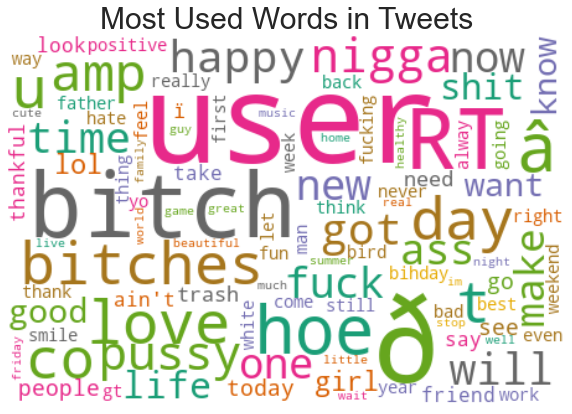

In [5]:
# Get the words from the dataset
allWords = ' '.join([twts for twts in tdf['Tweet']])
wordCloud = WordCloud(collocations=False, width=450, height=300, background_color='white', random_state=7, max_font_size=100, min_font_size=10, colormap='Dark2', stopwords=None).generate(allWords)

# Create new figure
plt.figure(figsize = (10, 8))
# Display data as image
plt.imshow(wordCloud, interpolation="bilinear")
# Hide the axis
plt.axis('off')
# Display title
plt.title(label='Most Used Words in Tweets', fontsize=30)
# Display only the figure
plt.show()

### Visualisation of Toxic Tweets
A word cloud containing the most used words from toxic tweets will be generated.

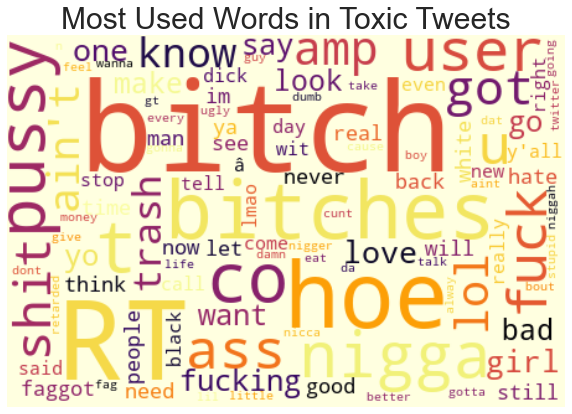

In [6]:
tWords = ' '.join([twts for twts in tdf[tdf['Toxicity'] == 1]['Tweet']])
wordCloud = WordCloud(collocations=False, width=450, height=300, background_color='lightyellow', random_state=7, max_font_size=100, min_font_size=10, colormap='inferno_r', stopwords=None).generate(tWords)

plt.figure(figsize = (10, 8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.title(label='Most Used Words in Toxic Tweets', fontsize=30)
plt.show()

### Visualisation of Non-Toxic Tweets
A word cloud containing the most used words from non-toxic tweets will be generated.

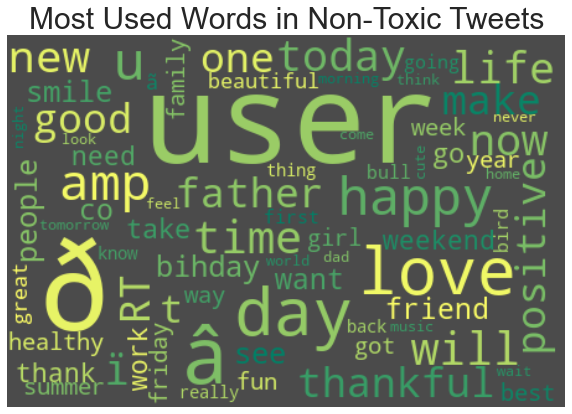

In [7]:
ntWords = ' '.join([twts for twts in tdf[tdf['Toxicity'] == 0]['Tweet']])
wordCloud = WordCloud(collocations=False, width=450, height=300, background_color='#4b4b4b', random_state=7, max_font_size=100, min_font_size=10, colormap='summer_r', stopwords=None).generate(ntWords)

plt.figure(figsize = (10, 8))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.title(label='Most Used Words in Non-Toxic Tweets', fontsize=30)
plt.show()

## Clean Data
The dataset will be cleaned and processed for training.

In [8]:
# Remove duplicates of data in dataset
tdf = tdf.drop_duplicates()

In [9]:
newTGrp = tdf.groupby("Toxicity")
newTGrp.describe()

Tweet                                                               
          count unique                                                top freq
Toxicity                                                                      
0         30389  30389   @user when a father is dysfunctional and is s...    1
1         23924  23924  @user #cnn calls #michigan middle school 'buil...    1

In [56]:
X = tdf['Tweet'].copy()
y = tdf['Toxicity'].copy()
X2 = tdf['Tweet'].copy()
y2 = tdf['Toxicity'].copy()

In [11]:
# Clean the data
def data_cleaner(tweet):
    tweet = tweet.lower()   # Convert to lowercase
    tweet = tweet.replace(":("," sad")
    tweet = tweet.replace(":)"," happy")
    tweet = tweet.replace(":3"," funny")
    tweet = tweet.replace(":d"," happy")
    tweet = tweet.replace(":-)"," happy")
    tweet = tweet.replace("=)"," happy")
    tweet = re.sub(r'http\S+', ' ', tweet)   # Remove urls
    tweet = re.sub(r'<.*?>',' ', tweet)      # Remove html tags
    tweet = re.sub(r'\d+',' ', tweet)        # Remove digits
    tweet = re.sub(r'#\w+',' ', tweet)       # Remove hashtags
    tweet = re.sub(r'@\w+',' ', tweet)       # Remove mentions
    tweet = re.sub(r'[^\w\s]',' ', tweet)    # Remove punctuation
    tweet = re.sub('[^A-Za-z0-9 ]+', '', tweet) # Remove characters that are not letters or numbers
    tweet = " ".join([word for word in tweet.split() if not word in stopWords])   # Remove stop words
    tweet = stemmer.stem(tweet)
    tweet = tweet.strip()  # Remove leading and trailing whitespaces
    return tweet

In [12]:
# Remove stopwords
stopWords = stopwords.words('english')
#Reduce the word to root form
stemmer = SnowballStemmer("english")

# Pass a function and apply it on every single value of the Pandas series
X_processed = X.apply(data_cleaner)
X_processed

0         father dysfunctional selfish drags kids dysfunct
1        thanks credit use cause offer wheelchair vans pdx
2                                           bihday majesti
3                                    love u take u time ur
4                                       factsguide societi
                               ...                        
56740    muthaf lie pearls right tl trash mine bible sc...
56741      gone broke wrong heart baby drove redneck crazi
56742    young buck wanna eat dat nigguh like aint fuck...
56743                      youu got wild bitches tellin li
56744    ruffled ntac eileen dahlia beautiful color com...
Name: Tweet, Length: 54313, dtype: object

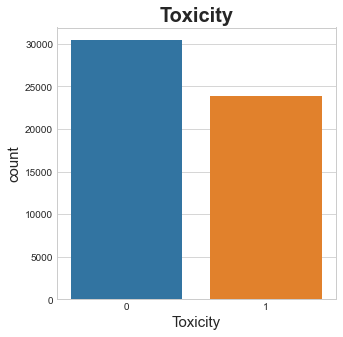

In [13]:
plt.figure(figsize=(5,5))
plt.xlabel('',fontsize=15)
plt.ylabel('',fontsize=15)
sns.countplot(x=tdf["Toxicity"],data=tdf).set_title('Toxicity',fontsize=20, fontdict={"weight": "bold"})
plt.show()

## Split the Data

In [14]:
X = X_processed
#Split the data for training and testing with 20% for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=11)

## Encode the Data into Numeric Value

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train) 
X_test_cv = cv.transform(X_test)

## Train Data

In [16]:
nb = BernoulliNB()
nb = nb.fit(X_train_cv, y_train)  # Fits Naive Bayes classifier according to X, y

y_train_pred = nb.predict(X_train_cv) # Performs the classificationon an array of text vectors X


Accuracy: 0.9414
Precision: 0.9416
Recall: 0.925
F1 Score: 0.9333


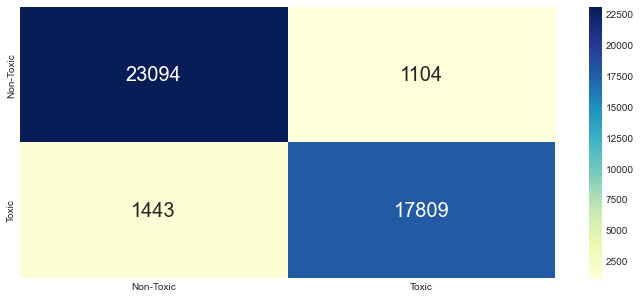

In [17]:
cm = confusion_matrix(y_train, y_train_pred) #y_train is the label of training data
sns.heatmap(cm, xticklabels=['Non-Toxic','Toxic'], yticklabels=['Non-Toxic','Toxic'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# Accuracy, Precision, Recall and F1 Score of Training Set
accuracy = round(sm.accuracy_score(y_train, y_train_pred), 4)
precision = round(sm.precision_score(y_train, y_train_pred), 4)
recall = round(sm.recall_score(y_train,y_train_pred), 4)
f1 = round(sm.f1_score(y_train, y_train_pred), 4)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [18]:
print(classification_report(y_train, y_train_pred, target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.94      0.95      0.95     24198
       Toxic       0.94      0.93      0.93     19252

    accuracy                           0.94     43450
   macro avg       0.94      0.94      0.94     43450
weighted avg       0.94      0.94      0.94     43450



## Test Data

In [19]:
y_pred_bayes = nb.predict(X_test_cv)

Accuracy: 0.9181
Precision: 0.9098
Recall: 0.8985
F1 Score: 0.9042


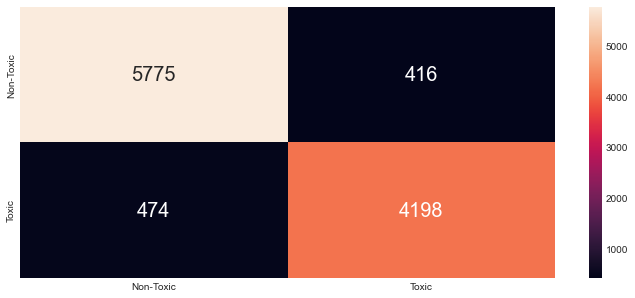

In [86]:
cm = confusion_matrix(y_test, y_pred_bayes) #y_train is the label of training data
sns.heatmap(cm, xticklabels=['Non-Toxic','Toxic'], yticklabels=['Non-Toxic','Toxic'],
annot=True, fmt='d', annot_kws={'fontsize':20});

# Accuracy, Precision, Recall and F1 Score of Training Set
accuracy = round(sm.accuracy_score(y_test, y_pred_bayes), 4)
precision = round(sm.precision_score(y_test, y_pred_bayes), 4)
recall = round(sm.recall_score(y_test,y_pred_bayes), 4)
f1 = round(sm.f1_score(y_test, y_pred_bayes), 4)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

In [87]:
print(classification_report(y_test, y_pred_bayes, target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.92      0.93      0.93      6191
       Toxic       0.91      0.90      0.90      4672

    accuracy                           0.92     10863
   macro avg       0.92      0.92      0.92     10863
weighted avg       0.92      0.92      0.92     10863



## Using Original Data without Preprocessing


### Training Unprocessed Data

In [88]:
def data_cleaner_for_RawData(tweet):
    tweet = " ".join([word for word in tweet.split()])   # Split
    return tweet

In [89]:
X2_processed = X2.apply(data_cleaner_for_RawData)
X2 = X2_processed

In [90]:
# Split the data for training and testing with 20% for testing and 80% for training
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.2, random_state=11)

from sklearn.feature_extraction.text import CountVectorizer
cv2 = CountVectorizer()
X2_train_cv = cv2.fit_transform(X2_train) 
X2_test_cv = cv2.transform(X2_test)

In [92]:
nb2 = BernoulliNB()
nb2 = nb2.fit(X2_train_cv, y2_train)  #Fits Naive Bayes according to X, y

y2_train_pred = nb2.predict(X2_train_cv) #Performs the classificationon an array of text vetors X

Accuracy: 0.9467
Precision: 0.9352
Recall: 0.9454
F1 Score: 0.9402


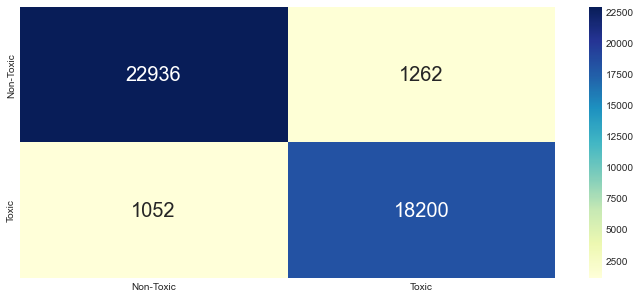

In [93]:
cm2 = confusion_matrix(y2_train, y2_train_pred) #y_train is the label of training data
sns.heatmap(cm2, xticklabels=['Non-Toxic','Toxic'], yticklabels=['Non-Toxic','Toxic'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

# Accuracy, Precision, Recall and F1 Score of Training Set
accuracy2 = round(sm.accuracy_score(y2_train, y2_train_pred), 4)
precision2 = round(sm.precision_score(y2_train, y2_train_pred), 4)
recall2 = round(sm.recall_score(y2_train, y2_train_pred), 4)
f12 = round(sm.f1_score(y2_train, y2_train_pred), 4)

print('Accuracy: {}'.format(accuracy2))
print('Precision: {}'.format(precision2))
print('Recall: {}'.format(recall2))
print('F1 Score: {}'.format(f12))

In [94]:
print(classification_report(y2_train, y2_train_pred, target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.96      0.95      0.95     24198
       Toxic       0.94      0.95      0.94     19252

    accuracy                           0.95     43450
   macro avg       0.95      0.95      0.95     43450
weighted avg       0.95      0.95      0.95     43450



### Testing Unprocessed Data

In [95]:
y2_test_pred = nb2.predict(X2_test_cv) #Performs the classificationon an array of text vetors X

Accuracy: 0.9227
Precision: 0.9052
Recall: 0.9161
F1 Score: 0.9106


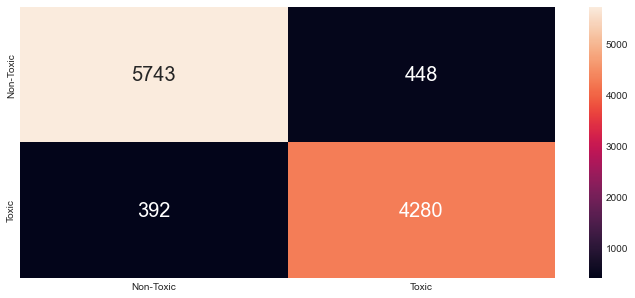

In [96]:
cm2 = confusion_matrix(y2_test, y2_test_pred) #y_train is the label of training data
sns.heatmap(cm2, xticklabels=['Non-Toxic','Toxic'], yticklabels=['Non-Toxic','Toxic'],
annot=True, fmt='d', annot_kws={'fontsize':20});

# Accuracy, Precision, Recall and F1 Score of Training Set
accuracy2 = round(sm.accuracy_score(y2_test, y2_test_pred), 4)
precision2 = round(sm.precision_score(y2_test, y2_test_pred), 4)
recall2 = round(sm.recall_score(y2_test, y2_test_pred), 4)
f12 = round(sm.f1_score(y2_test, y2_test_pred), 4)

print('Accuracy: {}'.format(accuracy2))
print('Precision: {}'.format(precision2))
print('Recall: {}'.format(recall2))
print('F1 Score: {}'.format(f12))

In [97]:
print(classification_report(y2_test, y2_test_pred, target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.94      0.93      0.93      6191
       Toxic       0.91      0.92      0.91      4672

    accuracy                           0.92     10863
   macro avg       0.92      0.92      0.92     10863
weighted avg       0.92      0.92      0.92     10863

